# A Little Python Review  (pt 1)
## [while playing with a simulation of the Luria-Delbrück experiment]


In [1]:
#importing libraries is simple, and numpy is a super useful one!
import numpy as np

### We can use a list to keep track of each organism in our population
Let's keep track of individuals as an integer, where the value `0` represents a sensitive individual and a `1` represents a resistant mutant. 


In [2]:
population = []

### Let's start our population out with a single sensitive individual

We can add on organisms to our population array using the `append` function, which tacks on whatever we pass in and sticks it on the end of the list. 

In [3]:
population.append(0)
print(population)

[0]


### First, we need to have our digital population "grow" 
For now, let's do this explicitly by having each of our organisms reproduce with some chance, `prob_repro`. We can loop through the population and check if each organism is lucky enough to reproduce in the next generation.

#### A few notes on Python specifics
`len(population)` is the size of the array holding our organisms (the population size), and `range(X)` will return an iterator that counts from 0 to X-1. 

`range(X)` is shorthand for `range(min, max, count)` where `min=0`, `max=X`, and `count=1`. But, we could use this function to count between 7 and 32, counting up by 2, for example by calling `range(7, 32, 2)`. 



In [4]:
#Each organism has a 50% chance of reproducing
prob_repro = 0.5 

for pop_idx in range(len(population)):
    if np.random.rand() < prob_repro:
        #the organism at pop_idx location in our array gets to reproduce! 
        population.append(population[pop_idx])
        
print(population)      
    

[0, 0]


### With only one individual, and a 50% chance of reproduction, we didn't see any growth this generation! 

Let's try running this for a few more generations. Maybe 5 for now.

I'm also going to explicitly re-create our population array, just so we're all starting at the same place.

#### A few things to focus on
Make sure the line `if np.random.rand() < prob_repro:` makes sense. This is the foundation of a lot of other probabilistic bits of code we'll be working with in class! 

I'm also introducing output formating, which is a nice way to print out more useful values. There are too many options to go through here, but it's something worth knowing about.


In [5]:
#start with a single organism in our population
population = [0]

num_generations = 5

for generation in range(num_generations):
    print("Gen {0}".format(generation+1))
    for pop_idx in range(len(population)):
        if np.random.rand() < prob_repro:
            #the organism at pop_idx location in our array gets to reproduce! 
            population.append(population[pop_idx])
            
    #now that we're done with reproduction for this generation let's print 
    #out the new population
    print(population)
    

Gen 1
[0, 0]
Gen 2
[0, 0, 0, 0]
Gen 3
[0, 0, 0, 0, 0, 0, 0, 0]
Gen 4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Gen 5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### I'm going to run this a few times, just so we can see how stochastic the growth is!

In [15]:
#start with a single organism in our population
population = [0]

num_generations = 5

for generation in range(num_generations):
    print("Gen {0}".format(generation+1))
    for pop_idx in range(len(population)):
        if np.random.rand() < prob_repro:
            #the organism at pop_idx location in our array gets to reproduce! 
            population.append(population[pop_idx])
            
    #now that we're done with reproduction for this generation let's print 
    #out the new population
    print(population)
    

Gen 1
[0, 0]
Gen 2
[0, 0, 0]
Gen 3
[0, 0, 0, 0, 0]
Gen 4
[0, 0, 0, 0, 0, 0]
Gen 5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
#start with a single organism in our population
population = [0]

num_generations = 5

for generation in range(num_generations):
    print("Gen {0}".format(generation+1))
    for pop_idx in range(len(population)):
        if np.random.rand() < prob_repro:
            #the organism at pop_idx location in our array gets to reproduce! 
            population.append(population[pop_idx])
            
    #now that we're done with reproduction for this generation let's print 
    #out the new population
    print(population)
    

Gen 1
[0]
Gen 2
[0]
Gen 3
[0, 0]
Gen 4
[0, 0]
Gen 5
[0, 0, 0]


## Some populations took off right away, and some like this last one didn't grow at all the first few generations!

This kind of randomness is sometimes called **demographic stochasticity** in biology, and it can be a really important part of the evolutionary process. For now, let's hold off on digging in too much here -- there will be another lab that's all about how this stochasticity affects evolution. 

### Instead, let's simulate many populations (i.e., replicates) all at once and plot how the population size changes over time.

To do this, we'll keep track of a `list` *of lists*, where each inner list is the population array associated with a particular replicate.

There are lots of ways to do this, but one of my favorite Python tricks is using list comprehensions, like where I've written `populations = [[0] for rep_idx in range(num_replicates)]` to define our list of lists with the right number of initialized population lists. 

To plot population sizes over time, we'll need another place to keep track of those! 

In [8]:
num_replicates = 5
num_generations = 10 #let's run a little longer this time

populations = [[0] for rep_idx in range(num_replicates)]
pop_sizes = [[] for rep_idx in range(num_replicates)]

for rep in range(num_replicates): 
    this_population = populations[rep]
    
    for generation in range(num_generations):
        for pop_idx in range(len(this_population)):
            if np.random.rand() < prob_repro:
                #the organism at pop_idx location in our array gets to reproduce! 
                this_population.append(this_population[pop_idx])

        pop_sizes[rep].append(len(this_population))
        print("Gen: {0}, Replicate: {1}, Pop Size: {2}".format(generation+1, rep, len(this_population)))

    print(" ") #just some whitespace for legibility
    

print("All Done! Let's look at the pop_size data.")
print(pop_sizes)

Gen: 1, Replicate: 0, Pop Size: 2
Gen: 2, Replicate: 0, Pop Size: 4
Gen: 3, Replicate: 0, Pop Size: 5
Gen: 4, Replicate: 0, Pop Size: 9
Gen: 5, Replicate: 0, Pop Size: 12
Gen: 6, Replicate: 0, Pop Size: 17
Gen: 7, Replicate: 0, Pop Size: 26
Gen: 8, Replicate: 0, Pop Size: 40
Gen: 9, Replicate: 0, Pop Size: 58
Gen: 10, Replicate: 0, Pop Size: 87
 
Gen: 1, Replicate: 1, Pop Size: 1
Gen: 2, Replicate: 1, Pop Size: 2
Gen: 3, Replicate: 1, Pop Size: 4
Gen: 4, Replicate: 1, Pop Size: 6
Gen: 5, Replicate: 1, Pop Size: 8
Gen: 6, Replicate: 1, Pop Size: 10
Gen: 7, Replicate: 1, Pop Size: 16
Gen: 8, Replicate: 1, Pop Size: 27
Gen: 9, Replicate: 1, Pop Size: 37
Gen: 10, Replicate: 1, Pop Size: 58
 
Gen: 1, Replicate: 2, Pop Size: 1
Gen: 2, Replicate: 2, Pop Size: 1
Gen: 3, Replicate: 2, Pop Size: 1
Gen: 4, Replicate: 2, Pop Size: 1
Gen: 5, Replicate: 2, Pop Size: 1
Gen: 6, Replicate: 2, Pop Size: 2
Gen: 7, Replicate: 2, Pop Size: 4
Gen: 8, Replicate: 2, Pop Size: 6
Gen: 9, Replicate: 2, Pop Size:

## Now let's make a plot of our growing populations!
`matplotlib` is Python's most popular plotting library, and as the name might suggest, it's trying to replicate the features of matlab's plotting. I don't ever use matlab, so that's all I have to say about that. 

Most of what we need is in the `pyplot` module, so we'll just load that one in. 

In [9]:
from matplotlib import pyplot as plt
plt.plot(pop_sizes)

plt.ylabel("Pop Size")
plt.xlabel("Generation")
plt.show()

<Figure size 640x480 with 1 Axes>

## Okay, this looks weird...
Our populations don't decrease in size, so we should right away know something is wrong! 

Matplotlib interprets these lists-of-lists a bit differently than we did, so we need to *transpose* the data. Numpy has a useful function called `transpose` we can use to do that for us! 

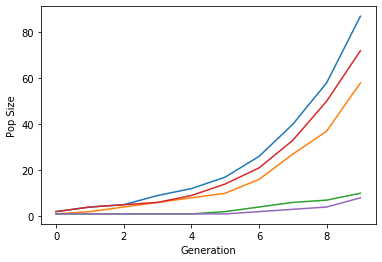

In [10]:
from matplotlib import pyplot as plt
plt.plot(np.transpose(pop_sizes))

plt.ylabel("Pop Size")
plt.xlabel("Generation")
plt.show()

### Cool!  We made a stochastic simulation of a population of organisms that are exponentially growing!

Let's run more replicates, and plot a distribution of final population sizes this time! 

In [11]:
num_replicates = 30
num_generations = 10 #let's run a little longer this time

populations = [[0] for rep_idx in range(num_replicates)]
pop_sizes = [[] for rep_idx in range(num_replicates)]

for rep in range(num_replicates): 
    this_population = populations[rep]
    
    for generation in range(num_generations):
        for pop_idx in range(len(this_population)):
            if np.random.rand() < prob_repro:
                #the organism at pop_idx location in our array gets to reproduce! 
                this_population.append(this_population[pop_idx])

        pop_sizes[rep].append(len(this_population))


## First, just the same plot with our new data

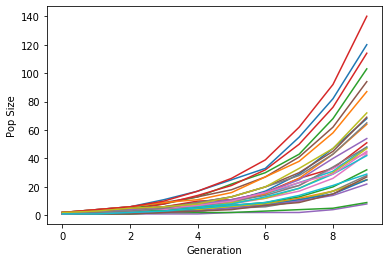

In [12]:
from matplotlib import pyplot as plt
plt.plot(np.transpose(pop_sizes))

plt.ylabel("Pop Size")
plt.xlabel("Generation")
plt.show()

## We've got to get the last value of the pop sizes out of our list-of-lists. 
We can return to my favorite tool -- the list comprehension. 

To get the last element out of a list, we can use the shortcut index `-1`. Python supports negative indexing, which you can think of as looping around from the beginning of the list to the end. 


In [13]:
pop_sizes
print([pop[-1] for pop in pop_sizes])

[68, 25, 103, 51, 8, 94, 44, 28, 25, 48, 25, 64, 9, 114, 54, 69, 43, 48, 47, 42, 120, 87, 32, 140, 22, 27, 45, 65, 72, 29]


#### Now we can turn this data into a histogram! 

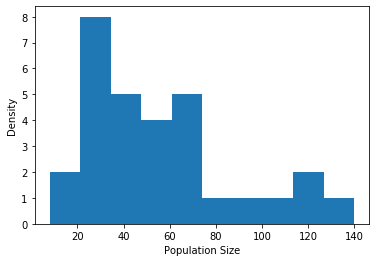

In [14]:
from matplotlib import pyplot as plt
plt.hist([pop[-1] for pop in pop_sizes])

plt.ylabel("Density")
plt.xlabel("Population Size")
plt.show()

# Go check out the Intro_2 Notebook to see how we can add mutations into the mix!